# MTA ACE DATASET ANALYSIS

In [3]:
#import the libraries
import numpy as np #import numpy library as np
import pandas as pd # importing pandas and using an acronym
from pandas import Series, DataFrame #import dataframe
import matplotlib.pyplot as plt #graphing
import folium #map library
from folium.plugins import HeatMap
import seaborn as sns #graph library
import geopandas as gpd #map library
import math #math

# Graph Makers


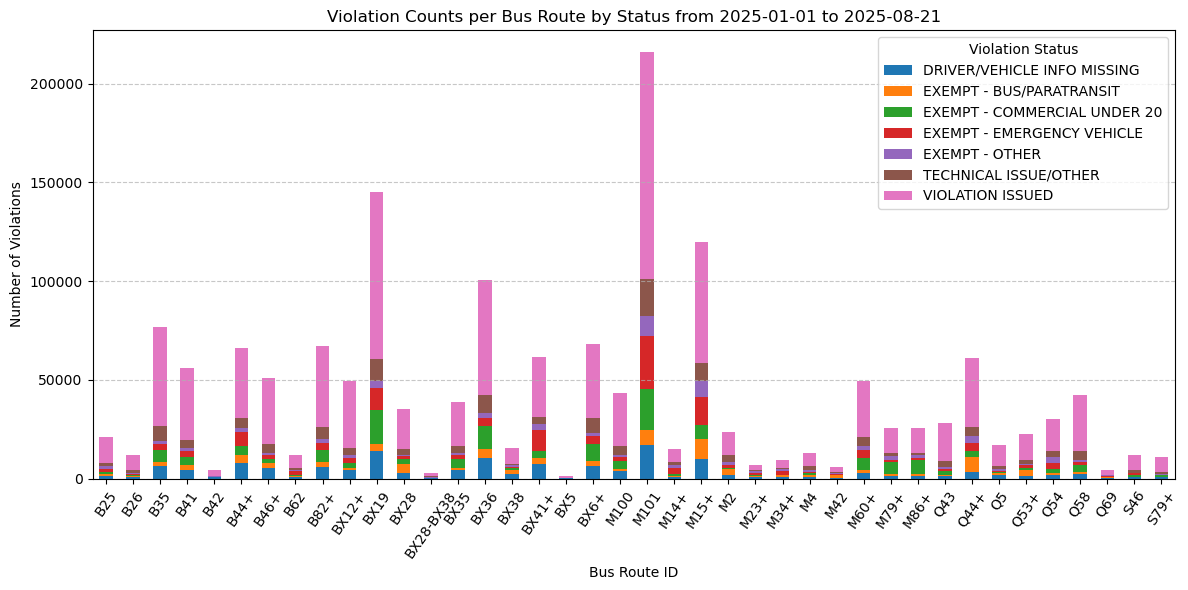

<Figure size 640x480 with 0 Axes>

In [226]:
df = MTASET3 #sets MTASET, the given ACE dataset at the time to df to work with all the graphs

# Ensure the 'Date' column is a datetime object (if not already)
df['last_occurrence'] = pd.to_datetime(df['last_occurrence'])

# Group by month (and year, implicitly, using 'M' period)
monthly_chunks = {}
for month_period, month_df in df.groupby(df['last_occurrence'].dt.to_period('Y')): #something something
    monthly_chunks[str(month_period)] = month_df

df = (monthly_chunks['2025']) #sets DF to be the YYYY-MM-DD

earliest_date = df['last_occurrence'].min() #makes graph based on the "last_occurance" date

latest_date = df['last_occurrence'].max() 

violation_count0 = df.pivot_table( #creates the table
    index='bus_route_id',
    columns='violation_status',
    aggfunc='size',
    fill_value=0
)

# Create the stacked bar chart
violation_count0.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add a title and labels for clarity
plt.title(f'Violation Counts per Bus Route by Status from {str(earliest_date)[:10]} to {str(latest_date)[:10]}')
plt.xlabel('Bus Route ID')
plt.ylabel('Number of Violations')
plt.xticks(rotation=55)
plt.legend(title='Violation Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add this line for a horizontal grid
plt.tight_layout() # Adjusts plot to fit labels

# Display the plot
plt.show()
plt.savefig('my_plot', format='pdf')

caption for above:\
The program above takes a portion of the MTA ACE dataset, aliased as MTASET 1 to 3, to create a graph visualizing the violations had by each bus route 

# Top 10 Stops by Violation Graph Maker

<Figure size 1200x800 with 0 Axes>

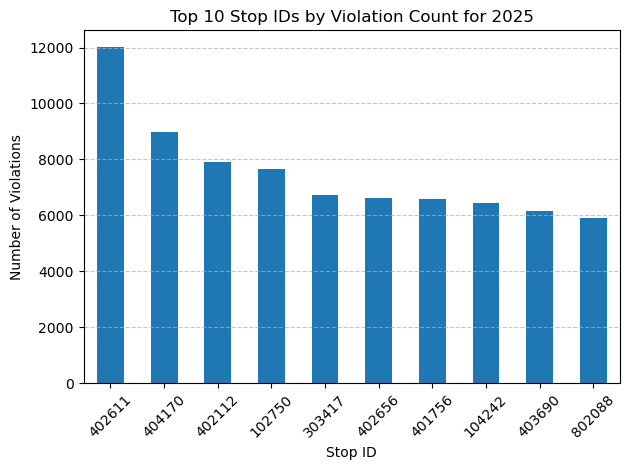


Top 10 Stop IDs with their violation counts and names for 2025:
    stop_id  violation_status                        stop_name bus_route_id
0    402611             12015                BROADWAY/ISHAM ST        BX12+
1    402611             12015                BROADWAY/ISHAM ST         M100
2    402611             12015                BROADWAY/ISHAM ST         BX28
3    402611             12015                BROADWAY/ISHAM ST    BX28-BX38
4    404170              8966                   W 207 ST/10 AV        BX12+
5    402112              7898          MADISON ST/CATHERINE ST         M15+
6    402112              7898          MADISON ST/CATHERINE ST         M101
7    102750              7663     WEBSTER AV/BEDFORD PARK BLVD        BX41+
8    102750              7663     WEBSTER AV/BEDFORD PARK BLVD    BX28-BX38
9    102750              7663     WEBSTER AV/BEDFORD PARK BLVD         BX28
10   303417              6733          BEDFORD AV/LAFAYETTE AV         B44+
11   303417            

In [179]:
#top 10 stop maker
stop_violations = df.groupby('stop_id')['violation_status'].count().reset_index()

#Sorts the counts and select the top 10.
top_10_stops = stop_violations.sort_values(by='violation_status', ascending=False).head(10)

# 4. Create the bar graph.
# You can use the DataFrame's built-in .plot() method for convenience.
plt.figure(figsize=(12, 8))  # Adjust the figure size for better readability
ax = top_10_stops.plot(
    kind='bar', 
    x='stop_id', 
    y='violation_status', 
    rot=45,  # Rotate x-axis labels to prevent overlap
    legend=False, 
    title=f'Top 10 Stop IDs by Violation Count for {str(earliest_date)[:4]}'
)

# Add labels and a title for clarity
ax.set_xlabel("Stop ID")
ax.set_ylabel("Number of Violations")
plt.tight_layout() # Adjusts plot to ensure all elements fit
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add this line for a horizontal grid

# Show the plot
plt.show()

# To get the stop names, you can merge the top_10_stops with the original dataframe.
# This assumes each stop_id has a consistent stop_name.
stop_names_map = df[['stop_id', 'stop_name', 'bus_route_id']].drop_duplicates()
top_10_with_names = top_10_stops.merge(stop_names_map, on='stop_id', how='left')

print(f"\nTop 10 Stop IDs with their violation counts and names for {str(earliest_date)[:4]}:")
print(top_10_with_names)

# Bottom 10 Stops by Violation Graph Maker

<Figure size 1200x800 with 0 Axes>

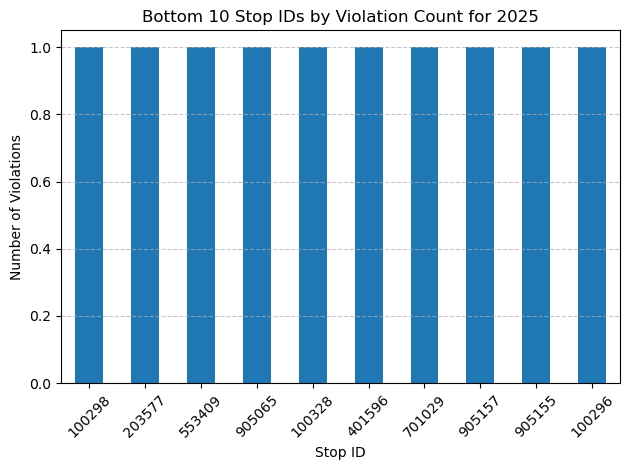


Bottom 10 Stop IDs with their violation counts and names for 2025:
   stop_id  violation_status                      stop_name bus_route_id
0   100298                 1  MACDONOUGH PL/COUNTRY CLUB RD         BX38
1   203577                 1             SOUTH AV/TRAVIS AV          S46
2   553409                 1         FRESH POND RD/GROVE ST          Q58
3   905065                 1        LINDBERGH AV/CLAWSON ST         S79+
4   100328                 1       BRUCKNER BLVD/BAISLEY AV         BX19
5   401596                 1                AVENUE D/E 4 ST         M34+
6   701029                 1                 108 ST/OTIS AV          Q58
7   905157                 1      TELEPORT DR/SOUTH AV EXIT          S46
8   905155                 1  TELEPORT DR/CORPORATE COMMONS          S46
9   100296                 1       BRUCKNER BLVD/KEARNEY AV          BX5


In [181]:
#bottom 10 maker
stop_violations = df.groupby('stop_id')['violation_status'].count().reset_index()

#Sorts the counts and select the top 10.
top_10_stops = stop_violations.sort_values(by='violation_status', ascending=True).head(10)

# 4. Create the bar graph.
# You can use the DataFrame's built-in .plot() method for convenience.
plt.figure(figsize=(12, 8))  # Adjust the figure size for better readability
ax = top_10_stops.plot(
    kind='bar', 
    x='stop_id', 
    y='violation_status', 
    rot=45,  # Rotate x-axis labels to prevent overlap
    legend=False, 
    title=f'Bottom 10 Stop IDs by Violation Count for {str(earliest_date)[:4]}'
)

# Add labels and a title for clarity
ax.set_xlabel("Stop ID")
ax.set_ylabel("Number of Violations")
plt.tight_layout() # Adjusts plot to ensure all elements fit
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add this line for a horizontal grid

# Show the plot
plt.show()

# To get the stop names, you can merge the top_10_stops with the original dataframe.
# This assumes each stop_id has a consistent stop_name.
stop_names_map = df[['stop_id', 'stop_name', 'bus_route_id']].drop_duplicates()
top_10_with_names = top_10_stops.merge(stop_names_map, on='stop_id', how='left')

print(f"\nBottom 10 Stop IDs with their violation counts and names for {str(earliest_date)[:4]}:")
print(top_10_with_names)

# Primary Contribuiting Violation Type per Bus Route Graph Maker

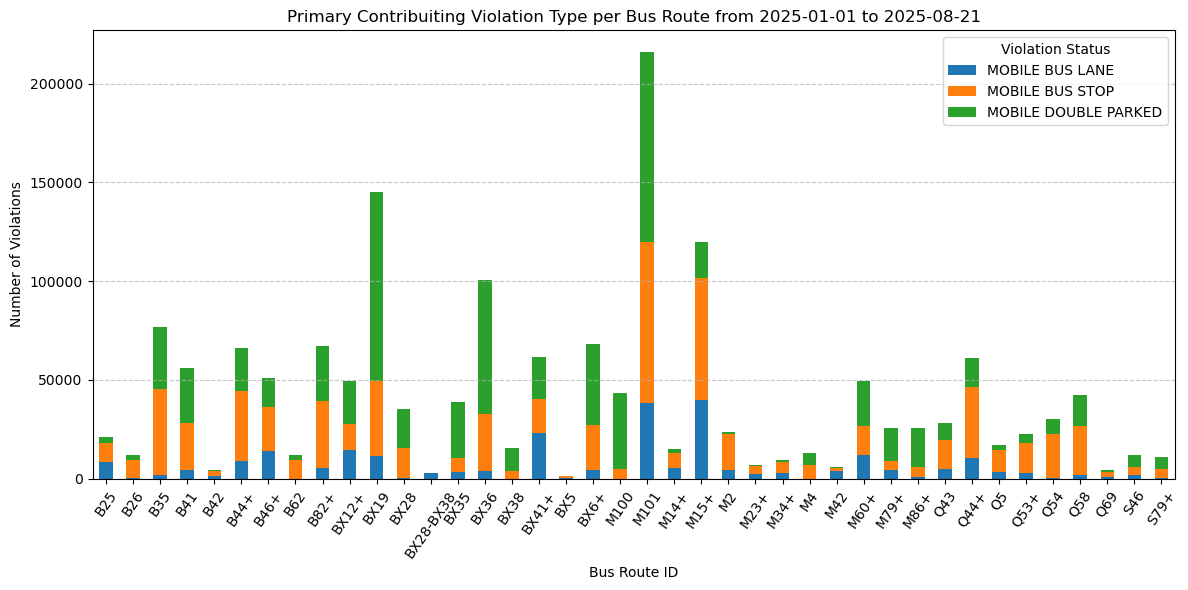

In [183]:
violation_type0 = df.pivot_table(
    index='bus_route_id',
    columns='violation_type',
    aggfunc='size',
    fill_value=0
)

# Create the stacked bar chart
violation_type0.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add a title and labels for clarity
plt.title(f'Primary Contribuiting Violation Type per Bus Route from {str(earliest_date)[:10]} to {str(latest_date)[:10]}')
plt.xlabel('Bus Route ID')
plt.ylabel('Number of Violations')
plt.xticks(rotation=55)
plt.legend(title='Violation Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add this line for a horizontal grid

plt.tight_layout() # Adjusts plot to fit labels

# Display the plot
plt.show()

# Total Violation By Bus Route Graph Maker

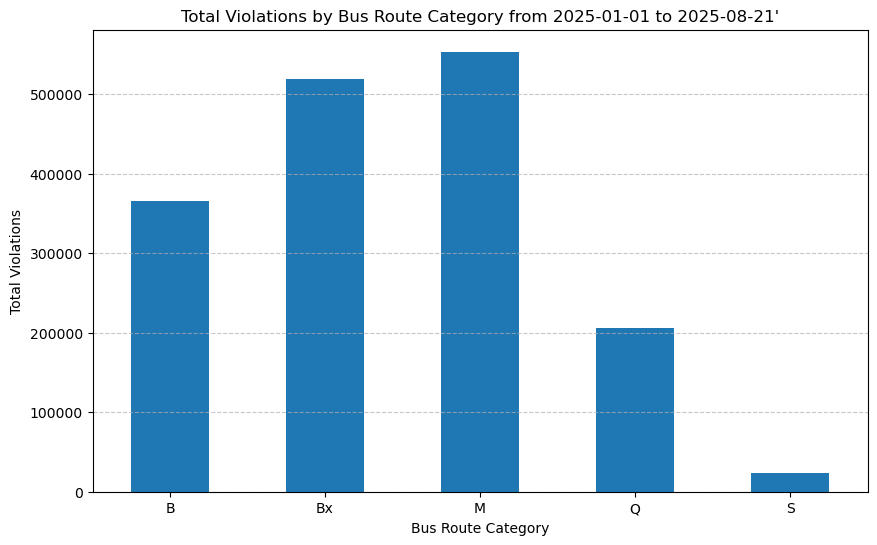

In [185]:
def get_bus_category(route_id):
    if route_id.startswith("BX"):
        return "Bx"
    elif route_id.startswith("B"):
        return "B"
    elif route_id.startswith("M"):
        return "M"
    elif route_id.startswith("Q"):
        return "Q"
    elif route_id.startswith("S"):
        return "S"
    return "Other"

df["bus_category"] = df["bus_route_id"].apply(get_bus_category)

violations_by_category = df.groupby("bus_category").size()

violations_by_category.plot(kind="bar", figsize=(10, 6))
plt.title(f"Total Violations by Bus Route Category from {str(earliest_date)[:10]} to {str(latest_date)[:10]}'")
plt.xlabel("Bus Route Category")
plt.ylabel("Total Violations")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add this line for a horizontal grid
plt.show()

# Violation Count Amount Finder 
it finds the amount of vehicles that have done X amount of violations. 

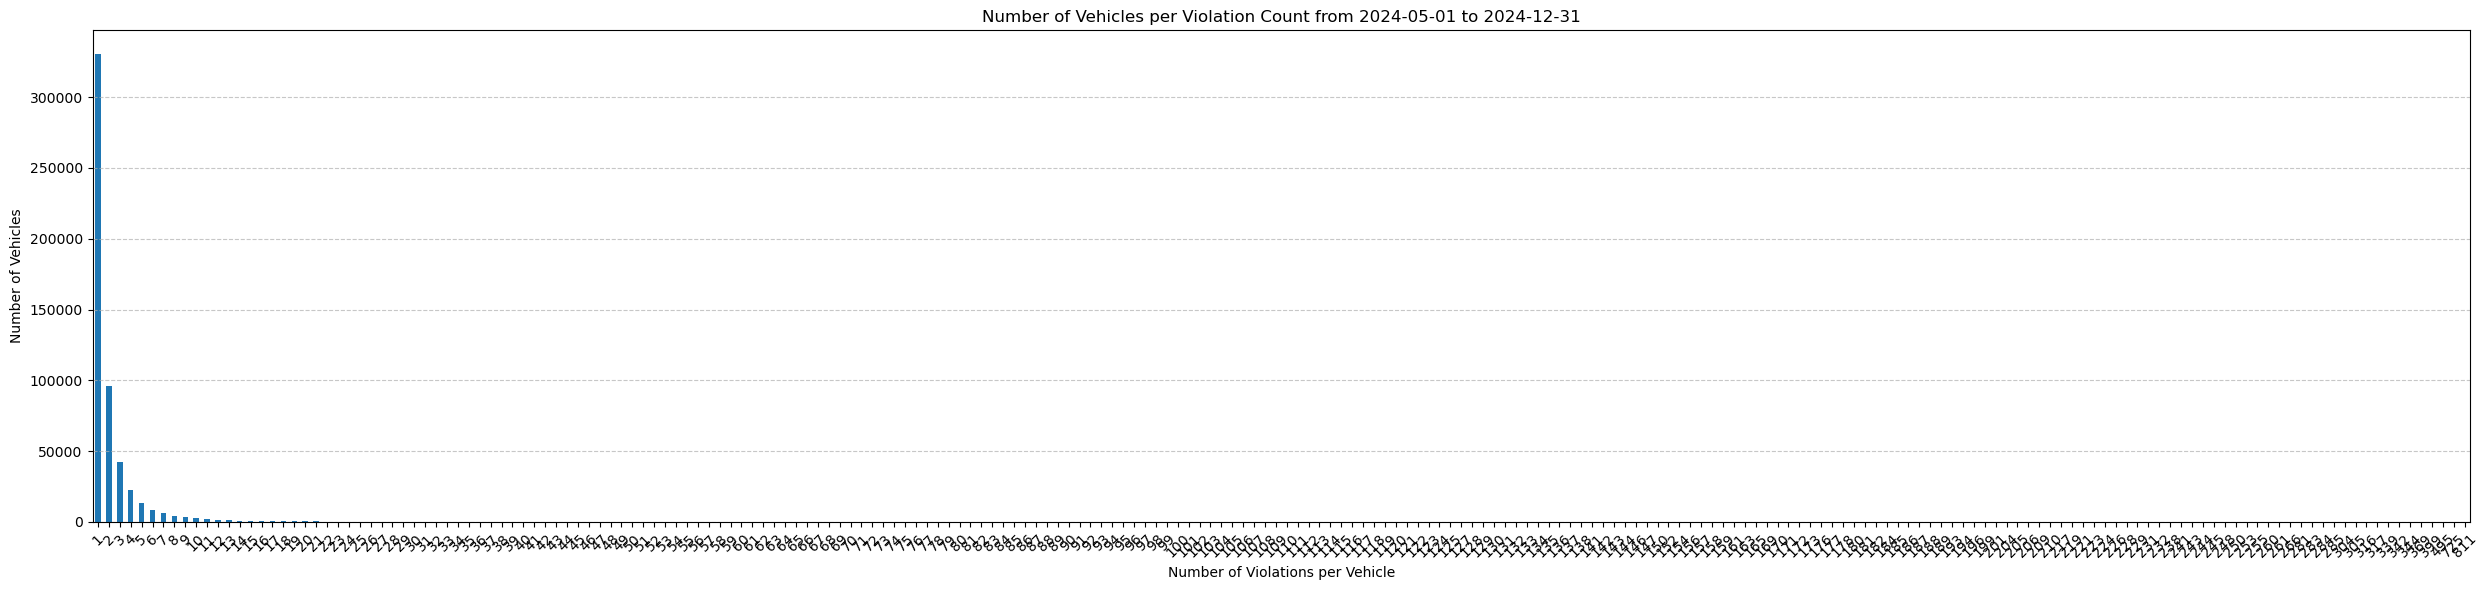

1      330672
2       95790
3       42142
4       22400
5       13185
        ...  
369         1
399         1
495         1
725         1
811         1
Name: count, Length: 218, dtype: int64


In [249]:
v_violation_counts = df.groupby('vehicle_id').size().sort_values(ascending=False) #gets amount of violations per bus route

vehicles_per_violation_count = v_violation_counts.value_counts().sort_index()

# Step 2: Plot the resulting Series as a bar chart.
vehicles_per_violation_count.plot(kind='bar', figsize=(25, 6))

# Add titles and labels for clarity
plt.title(f'Number of Vehicles per Violation Count from {str(earliest_date)[:10]} to {str(latest_date)[:10]}')
plt.xlabel('Number of Violations per Vehicle')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

# You can also see the Series data itself:
print(vehicles_per_violation_count)

In [106]:
url = "https://data.ny.gov/resource/kh8p-hcbm.csv?"
MTASET1 = pd.read_csv(url, na_values="?") #defines DF as pandas read function for CSV
MTASET1

,violation_id,vehicle_id,first_occurrence,last_occurrence,violation_status,violation_type,bus_route_id,violation_latitude,violation_longitude,stop_id,stop_name,bus_stop_latitude,bus_stop_longitude,violation_georeference,bus_stop_georeference
0,489749182,c5ae1411153b52556a1e648cc80d718aa519a4bdd189ab...,2025-08-20T23:12:08.000,2025-08-21T00:24:08.000,TECHNICAL ISSUE/OTHER,MOBILE BUS STOP,BX36,40.840509,-73.881189,102498,EAST TREMONT AV/VYSE AV,40.841076,-73.882483,POINT (-73.881189 40.840509),POINT (-73.882483 40.841076)
1,489744714,df9044acf85cf55488aea4cd3ce1d0e17ef050551726b6...,2025-08-20T23:48:59.000,2025-08-20T23:54:47.000,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,BX28,40.874017,-73.890646,100080,PAUL AV/BEDFORD PARK BLVD,40.874629,-73.891539,POINT (-73.890646 40.874017),POINT (-73.891539 40.874629)
2,489743631,eb5a337966ba65f66ab1db8e169d2446a4fb429b0efc63...,2025-08-20T22:33:13.000,2025-08-20T23:56:02.000,TECHNICAL ISSUE/OTHER,MOBILE DOUBLE PARKED,Q53+,40.721971,-73.867136,550473,WOODHAVEN BLVD/PENELOPE AV,40.722487,-73.867736,POINT (-73.867136 40.721971),POINT (-73.867736 40.722487)
3,489741945,3f877f70d9b253515a945be807c9c62d5814949f810310...,2025-08-20T22:50:45.000,2025-08-20T23:32:43.000,EXEMPT - OTHER,MOBILE BUS STOP,Q44+,40.762529,-73.831728,501140,UNION ST/35 AV,40.765422,-73.827944,POINT (-73.831728 40.762529),POINT (-73.827944 40.765422)
4,489741940,7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...,2025-08-20T10:52:57.000,2025-08-20T11:16:57.000,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.815113,-73.955040,401458,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.95504 40.815113),POINT (-73.954424 40.816009)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,489631873,53e914247c7ca545d1c6c48c0aca7aac0ecbfbd91d50ea...,2025-08-21T16:51:45.000,2025-08-21T16:56:17.000,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,M2,40.758956,-73.976984,450123,5 AV/W 50 ST,40.758880,-73.977029,POINT (-73.97698388774229 40.758956173264124),POINT (-73.977029 40.75888)
996,489631640,e1c6c4919b88e30bfca93a9d0362da030fd322d74d54a5...,2025-08-20T23:15:40.000,2025-08-20T23:26:11.000,TECHNICAL ISSUE/OTHER,MOBILE BUS STOP,M4,40.826842,-73.950333,400658,BROADWAY/W 150 ST,40.829398,-73.948497,POINT (-73.95033251074187 40.82684161216622),POINT (-73.948497 40.829398)
997,489631472,5dac2e768375b59c4f3da6bf45775cd9fbb72c8cbe6357...,2025-08-21T16:06:06.000,2025-08-21T16:25:06.000,TECHNICAL ISSUE/OTHER,MOBILE BUS STOP,M2,40.790036,-73.952031,404191,MADISON AV/E 95 ST,40.786932,-73.954292,POINT (-73.95203062978655 40.790036083928236),POINT (-73.954292 40.786932)
998,489631458,ab5f2f1af71bf83c9fe79561354102aa441dd408576a2a...,2025-08-21T16:12:22.000,2025-08-21T16:22:55.000,TECHNICAL ISSUE/OTHER,MOBILE DOUBLE PARKED,M2,40.802721,-73.953030,400287,ADAM C POWELL BLVD/W 116 ST,40.803591,-73.952433,POINT (-73.95303000277217 40.80272074212583),POINT (-73.952433 40.803591)


In [5]:
#imports the dataset information to create graphs from
#url = "https://data.ny.gov/resource/kh8p-hcbm.csv?$limit=3132753" #2025 to 2024 #290987
url = "https://data.ny.gov/resource/kh8p-hcbm.csv?$limit=290987&$offset=3132753" #2023-2024


MTASET2 = pd.read_csv(url, na_values="?") #defines DF as pandas read function for CSV
MTASET2

,violation_id,vehicle_id,first_occurrence,last_occurrence,violation_status,violation_type,bus_route_id,violation_latitude,violation_longitude,stop_id,stop_name,bus_stop_latitude,bus_stop_longitude,violation_georeference,bus_stop_georeference
0,399377716,e4b0bbd173f8573dee0dd68e4be7831685704128b683b7...,2024-01-02T10:35:51.000,2024-01-02T10:42:11.000,VIOLATION ISSUED,MOBILE BUS LANE,BX36,40.847039,-73.920284,100149,UNIVERSITY AV/W 174 ST,40.846858,-73.920440,POINT (-73.920284 40.847039),POINT (-73.92044 40.846858)
1,399377603,d6bccbdb31d72193313ccae03e3df698dd332634703c6e...,2024-01-02T07:56:40.000,2024-01-02T08:03:51.000,VIOLATION ISSUED,MOBILE BUS LANE,Q43,40.711859,-73.787551,500197,HILLSIDE AV/EDGERTON BL,40.712223,-73.785799,POINT (-73.787551 40.711859),POINT (-73.785799 40.712223)
2,399377537,6e9b4101844112df27d4b9c99b48d5b0fef33fbb194914...,2024-01-02T11:19:41.000,2024-01-02T11:40:31.000,DRIVER/VEHICLE INFO MISSING,MOBILE BUS LANE,Q44+,40.752528,-73.826890,502179,MAIN ST/ELDER AV,40.751385,-73.825899,POINT (-73.82689 40.752528),POINT (-73.825899 40.751385)
3,399377475,229eb8be0d1c73c8c46aa53455a552593dc06bab3129cf...,2024-01-02T11:18:51.000,2024-01-02T11:42:51.000,DRIVER/VEHICLE INFO MISSING,MOBILE BUS LANE,BX41+,40.852806,-73.897848,102806,WEBSTER AV/E FORDHAM RD,40.861287,-73.891854,POINT (-73.897848 40.852806),POINT (-73.891854 40.861287)
4,399377416,9ac69c2a04d067a55537a33a7baa47a0c874261c990ad7...,2024-01-02T10:07:33.000,2024-01-02T10:30:00.000,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS LANE,M14+,40.732065,-73.984273,401192,E 14 ST/2 AV,40.732083,-73.984535,POINT (-73.984273 40.732065),POINT (-73.984535 40.732083)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290982,348776635,b38d735e2bb8952c9697c4c696af72fbe1e8cdc0ce1240...,2023-01-03T08:37:07.000,2023-01-03T08:46:46.000,VIOLATION ISSUED,MOBILE BUS LANE,BX41+,40.857314,-73.894934,102806,WEBSTER AV/E FORDHAM RD,40.861287,-73.891854,POINT (-73.894934 40.857314),POINT (-73.891854 40.861287)
290983,348776634,371e1b064dee862140afa87363c1a1cac9ea3b7a9a7639...,2023-01-03T11:14:21.000,2023-01-03T11:24:03.000,VIOLATION ISSUED,MOBILE BUS LANE,BX12+,40.862744,-73.902400,104331,E FORDHAM RD/ JEROME AV,40.862839,-73.901247,POINT (-73.9024 40.862744),POINT (-73.901247 40.862839)
290984,348776633,7a3075bca5441d8a05f20ed79dab9da44bc1989ddfa8e9...,2023-01-03T07:09:35.000,2023-01-03T07:26:14.000,VIOLATION ISSUED,MOBILE BUS LANE,BX12+,40.867126,-73.920813,404170,W 207 ST/10 AV,40.864421,-73.918721,POINT (-73.920813 40.867126),POINT (-73.918721 40.864421)
290985,348776626,0b78694c89c37d9e17765b6d8a8b8491c49dfc92a0ca6a...,2023-01-03T11:07:44.000,2023-01-03T11:32:23.000,VIOLATION ISSUED,MOBILE BUS LANE,BX19,40.816289,-73.918613,101310,E 149 ST/COURTLANDT AV,40.816543,-73.919779,POINT (-73.918613 40.816289),POINT (-73.919779 40.816543)


In [67]:
url2 = "https://data.ny.gov/resource/kh8p-hcbm.csv?$limit=3132753" #2025 to 2024 #290987
MTASET3 = pd.read_csv(url2, na_values="?") #defines DF as pandas read function for CSV

In [195]:
#MTASET.groupby(['violation_status','bus_route_id'], as_index=False)['violation_type'].sum()

In [62]:
count_violation_amount = df['violation_status'].value_counts().get('EXEMPT - OTHER')
print("Occurrences of 'EMERGENCY VECHICLE':", count_violation_amount)

Occurrences of 'EMERGENCY VECHICLE': 43817


In [102]:
totalcount_violation_amount = df['violation_status'].str.count('VIOLATION ISSUED').sum()
print("Occurrences of 'VIOLATION_ISSUED':", totalcount_violation_amount)

Occurrences of 'VIOLATION_ISSUED': 973310


In [96]:
missing_violation_amount = df['violation_status'].str.count('DRIVER/VEHICLE INFO MISSING')
print("Occurrences of 'DRIVER/VEHICLE INFO MISSING':", missing_violation_amount)
print(len(missing_violation_amount))

Occurrences of 'DRIVER/VEHICLE INFO MISSING': 1628724    0
1631588    0
1632198    0
1632205    0
1634928    0
          ..
3132748    0
3132749    0
3132750    0
3132751    0
3132752    0
Name: violation_status, Length: 1464865, dtype: int64
1464865


In [42]:
totalcount = len(df)
print("total violations", totalcount)

total violations 1464865


In [247]:
totalv = len(df.drop_duplicates()) #get total amount of violations from the time frame
# COUNT ISSUED VIOLATIONS
issued = df['violation_status'].str.count('VIOLATION ISSUED').sum() #amount of issued violations
# COUNT MISSING INFO
missing_info = df['violation_status'].str.count('DRIVER/VEHICLE INFO MISSING') #amount of issued violations
# COUNT EXEMPTS
#exempt_bus = df['violation_status'].value_counts().get('EXEMPT - BUS/PARATRANSIT')
#exempt_com20 = df['violation_status'].value_counts().get('EXEMPT - COMMERCIAL UNDER 20')
#exempt_ev = df['violation_status'].value_counts().get('EXEMPT - EMERGENCY VEHICLE')
#exempt_other = df['violation_status'].value_counts().get('EXEMPT - OTHER')
# MAKE PERCENTAGES
#exempt_total = exempt_bus + exempt_com20 + exempt_ev + exempt_other

issued

198153

# Pie Chart Makers
As long as "df" is defined, it creates a pie chart of the relevant information 

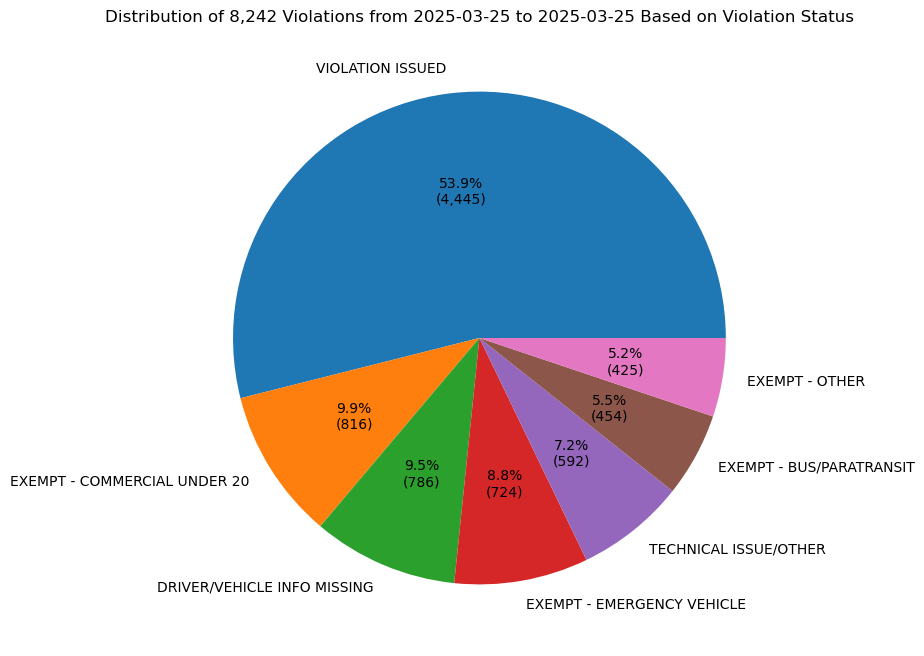

In [215]:
#Pie chart maker which gets percentage of each violation status
string_counts = df['violation_status'].value_counts()
total_violations = sum(string_counts)

# Define a custom function for the autopct parameter
def autopct_generator(pct):
    # Calculate the count for each wedge using the percentage
    count = int(round(pct * total_violations / 100))
    # Use ':,d' to add commas to the count
    return f'{pct:.1f}%\n({count:,d})'

# Create the pie chart using the custom autopct function
string_counts.plot.pie(autopct=autopct_generator, figsize=(10, 8))

ax.legend(string_counts.index, loc='best')

plt.title(f'Distribution of {len(df):,d} Violations from {str(earliest_date)[:10]} to {str(latest_date)[:10]} Based on Violation Status')
plt.ylabel('') # Hide the default 'Category' label on the y-axis
plt.show()

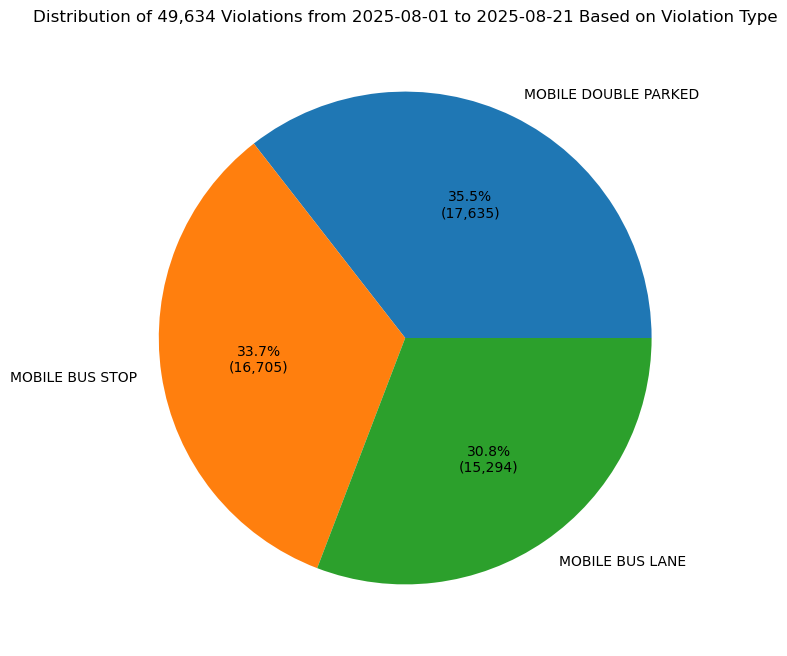

In [201]:
#Pie chart maker which gets percentage of each violation type (double parked, bus lane or bus stop)
string_counts = df['violation_type'].value_counts()
total_violations = sum(string_counts)

# Define a custom function for the autopct parameter
def autopct_generator(pct):
    # Calculate the count for each wedge using the percentage
    count = int(round(pct * total_violations / 100))
    # Use ':,d' to add commas to the count
    return f'{pct:.1f}%\n({count:,d})'

# Create the pie chart using the custom autopct function
string_counts.plot.pie(autopct=autopct_generator, figsize=(10, 8))

ax.legend(string_counts.index, loc='best')

plt.title(f'Distribution of {len(df):,d} Violations from {str(earliest_date)[:10]} to {str(latest_date)[:10]} Based on Violation Type')
plt.ylabel('') # Hide the default 'Category' label on the y-axis
plt.show()

In [197]:
#MTASET.groupby(['violation_status','bus_route_id'], as_index=False)['violation_type'].sum()

In [206]:
#gets total of missing info violations
missing_info = df['violation_status'].str.count('DRIVER/VEHICLE INFO MISSING').sum() #amount of issued violations
missing_info

20601

In [145]:
# gets the bus routes with the highest amount of violations
violation_counts = df.groupby('bus_route_id').size().sort_values(ascending=False) #gets amount of violations per bus route
violation_counts

bus_route_id
BX41+    75072
BX12+    56527
M15+     46075
Q44+     25559
BX19     17012
B46+     13552
BX36      7810
M14+      7625
B25       6914
B44+      6675
Q54       6624
BX35      6574
Q43       6005
Q58       2483
B42       1956
S79+      1434
M34+      1048
M23+       970
B62        412
M86+       255
B26         39
dtype: int64

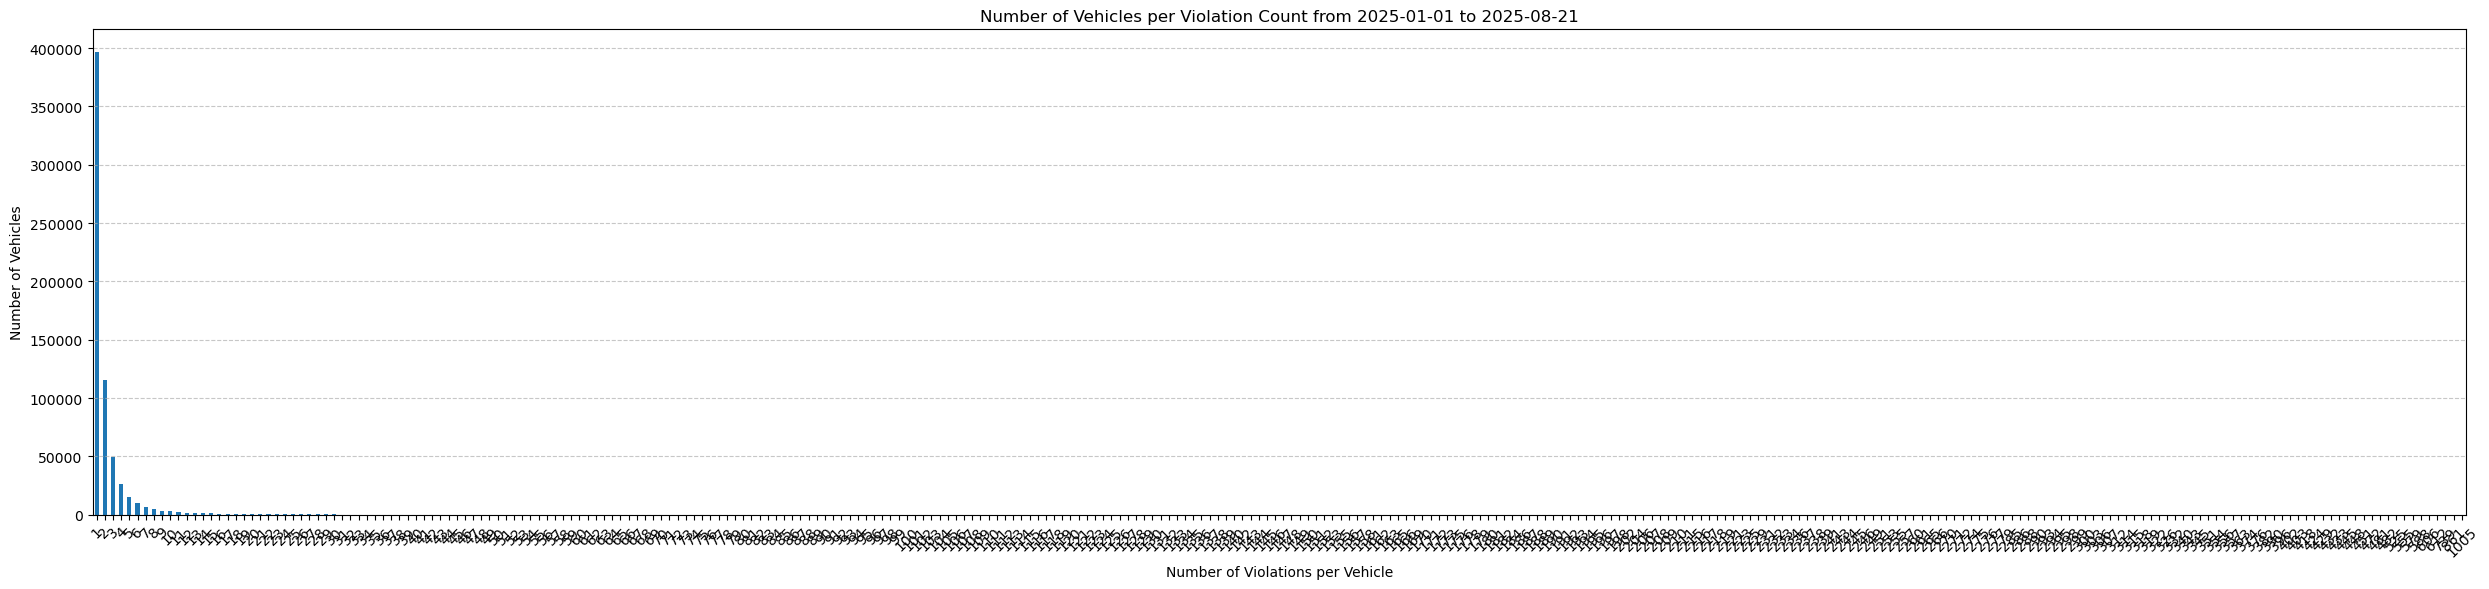

1       396338
2       115552
3        49627
4        25998
5        15196
         ...  
606          1
612          1
739          1
861          1
1005         1
Name: count, Length: 290, dtype: int64


In [234]:
#graph which uses the amount of violations as the X axis, and the amount of vehicles that have commited X violations for the Y
v_violation_counts = df.groupby('vehicle_id').size().sort_values(ascending=False) #gets amount of violations per bus route

vehicles_per_violation_count = v_violation_counts.value_counts().sort_index()

# Step 2: Plot the resulting Series as a bar chart.
vehicles_per_violation_count.plot(kind='bar', figsize=(25, 6))

# Add titles and labels for clarity
plt.title(f'Number of Vehicles per Violation Count from {str(earliest_date)[:10]} to {str(latest_date)[:10]}')
plt.xlabel('Number of Violations per Vehicle')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

# You can also see the Series data itself:
print(vehicles_per_violation_count)

# Map Makers

In [213]:
#heatmap maker

DATASET = df

map_center = [DATASET['violation_latitude'].mean(), DATASET['violation_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Extract the latitude and longitude columns as a list of lists.
heat_data = [[row['violation_latitude'], row['violation_longitude']] for index, row in DATASET.iterrows()]

# Add the heatmap layer to the map.
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file. You can then open this file in a web browser.
m.save('bus_violation_heatmap2025march25.html')